In [104]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pickle
import numpy_groupies as npg

In [137]:
def get_images(name, size):
    images = np.empty((size, 784), dtype=np.int64)
    numbers = np.empty(size, dtype=np.int64)

    with open(name, 'rt') as file:
        for i in range(size):
            row = file.readline().split(',')

            numbers[i] = row[0]
            images[i] = row[1:]


    return numbers, images

def show_image(image):
    plt.imshow(image.reshape((28,28)), cmap='gray')
    plt.show()

# def k_nearest_neighbour(image, numbers, images, k):
#     sorted_indices = np.argsort(np.linalg.norm(images-image, axis=-1))
#     return Counter(numbers[i] for i in sorted_indices[:k]).most_common(1)[0][0]`

# Find k nearest neighbours
#   Take first k values and sort
#   Go over the rest and insert if its smaller than the maximum value
# Generate all smaller results

def k_nearest_neighbours(train_images, test_image, k, dist_func):
    return np.argpartition(dist_func(train_images, test_image), range(1,k+1), axis=-1)[:k]

def euclid_dist(images, image):
    return np.linalg.norm(images-image, axis=-1)

def get_most_common(image_indices, numbers):
    return Counter(numbers[i] for i in image_indices).most_common(1)[0][0]

In [129]:
# MNIST_train 60000 images
# MNIST_test 10000 images
# MNIST_train_small 3000 images
# MNIST_test_small 1000 images

# 11 seconds for 60000 images
# images = get_images('data/MNIST_train.csv', 60000)
numbers_train_small, images_train_small = get_images('data/MNIST_train_small.csv', 3000)
numbers_test_small, images_test_small = get_images('data/MNIST_test_small.csv', 1000)

In [74]:
(images_train_small - images_test_small[0]).shape
# (n, 784) - 784
# (n, m, 784) - (m, 784)

(3000, 784)

In [67]:
np.tile(images_train_small, (10, 1, 1)) - images_test_small[:10]

ValueError: operands could not be broadcast together with shapes (10,3000,784) (10,784) 

In [49]:
# nearest_indices = k_nearest_neighbours(images_test_small, images_train_small, 1, euclid_dist)
np.tile(images_train_small, (images_test_small.shape[0], 1)) - images_test_small.transpose()
# np.tile(np.array([i for i in range(10)]),(2,1)) - np.array([1,2]).reshape(2,1)

MemoryError: Unable to allocate 17.5 GiB for an array with shape (1000, 2352000) and data type float64

In [7]:
img = images_test_small[0]

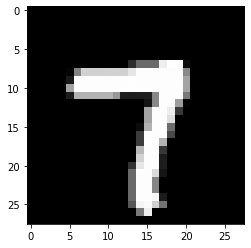

In [9]:
show_image(img)

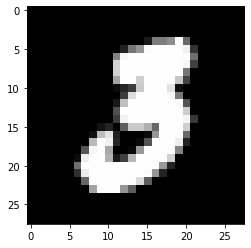

In [142]:
show_image(images_test_small[3])

In [153]:
test_n = len(numbers_test_small)
k_range = 20
result = np.empty((k_range, test_n))

neighbour_func = lambda x: k_nearest_neighbours(images_train_small, x, k_range, euclid_dist)

arg_max_func = lambda k: np.argmax(npg.aggregate(numbers_train_small[list(map(neighbour_func, [images_test_small[3]]))[0]][:k], 1))

result = list(map(arg_max_func, range(1,k_range+1)))
print(result)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [152]:
len(result)

100

In [111]:
img_idx = np.argpartition(np.array([10-i for i in range(10)]), 4)

In [112]:
[numbers_test_small[i] for i in img_idx]

[2, 6, 3, 4, 1, 9, 2, 3, 1, 7]

In [113]:
numbers_test_small[img_idx]

array([2, 6, 3, 4, 1, 9, 2, 3, 1, 7], dtype=int8)

In [102]:
k_nearest_neighbours(images_train_small, images_test_small[0], 10, euclid_dist)

array([1442, 1157, 2211, 2681,  434,  504, 1555, 1270, 2537, 2696],
      dtype=int64)

In [6]:
# takes about 10 minutes
with open('result.csv', 'xt') as file:
    for k in range(k_range):
        for i in range(test_n):
            file.write(str(k_nearest_neighbour(images_test_small[i], numbers_train_small, images_train_small, k+1)))
            if i < test_n-1:
                file.write(',')
        file.write('\n')